<a href="https://www.kaggle.com/code/bethgitau/housing-information-analysis?scriptVersionId=233289988" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# **Housing Prices in Ames**
We will use a data set of home prices for the city of Ames, Iowa, to learn basic data manipulation techniques.
There are 79 explanatory variables related to housing, so let's explore their relationship with price.

# **Dataset Preparation**
We will use the train.csv dataset to conduct housing pricing analysis.
# 1. Acquiring a Dataset
Using pd.read_csv() to store dataset in a variable

In [1]:
# Loading Libraries
import pandas as pd
import numpy as np
import itertools
import matplotlib.pyplot as plt

In [2]:
# Load dataset
train_df = pd.read_csv('/kaggle/input/home-data-for-ml-course/train.csv')

# Checking the first few rows
train_df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


# 2. Examining The Dataset Itself
This dataset is from the "Home Data for ML Course" competition, and it contains data on home sales in Ames, Iowa. It's used to practice supervised machine learning, regression tasks, where the goal is to predict house sale prices based on various features.

The train dataset contains features (independent variables) and target variable (SalePrice).

There are 79 explanatory variables describing various aspects of residential houses.

# Data Fields
*# Physical Characteristics:*

OverallQual: Overall material and finish quality

GrLivArea: Above grade (ground) living area square feet

TotalBsmtSF: Total square feet of basement area

GarageCars: Size of garage in car capacity

GarageArea: Size of garage in square feet

1stFlrSF, 2ndFlrSF, LotArea: Floor and lot sizes

*# Location and Quality:*

Neighborhood: Physical locations within Ames city limits

LotConfig: Lot configuration (e.g., inside lot, corner lot)

*# Time-related:*

YearBuilt: Original construction date

YearRemodAdd: Remodel date

*# Condition and Finish:*

ExterQual: Exterior material quality

KitchenQual: Kitchen quality

BsmtQual: Basement height quality

*# Others Characteristics:*

MasVnrType: Masonry veneer type

Fireplaces: Number of fireplaces

PoolArea: Pool area in square feet

*# Target Variable:*

SalePrice: The property’s sale price in dollars — this is the variable you're trying to predict.

# **Data Overview**
# 3. Checking The Data
Using a combination of code and markdown, we look at the data's
- Features
- Check which column is the target variable
- Display the mean, standard deviation and quartiles of a feature at once


In [3]:
# 1. Checking Each feature
train_df.dtypes

Id                 int64
MSSubClass         int64
MSZoning          object
LotFrontage      float64
LotArea            int64
                  ...   
MoSold             int64
YrSold             int64
SaleType          object
SaleCondition     object
SalePrice          int64
Length: 81, dtype: object

In [4]:
# Create a summary DataFrame
summary = pd.DataFrame({
    'Feature': train_df.columns,
    'Data Type': train_df.dtypes.values,
    'Missing Values': train_df.isnull().sum().values,
    'Unique Values': train_df.nunique().values,
    'Example Value': train_df.iloc[0].values
})
print(summary)

          Feature Data Type  Missing Values  Unique Values Example Value
0              Id     int64               0           1460             1
1      MSSubClass     int64               0             15            60
2        MSZoning    object               0              5            RL
3     LotFrontage   float64             259            110          65.0
4         LotArea     int64               0           1073          8450
..            ...       ...             ...            ...           ...
76         MoSold     int64               0             12             2
77         YrSold     int64               0              5          2008
78       SaleType    object               0              9            WD
79  SaleCondition    object               0              6        Normal
80      SalePrice     int64               0            663        208500

[81 rows x 5 columns]


In [5]:
# Count of Columns by DataType
train_df.dtypes.value_counts()

object     43
int64      35
float64     3
Name: count, dtype: int64

In [6]:
# 2. Check which column is the target variable
# Showing all column names
train_df.columns
# Confirming the target variable directly
'target' in train_df.columns
'SalePrice' in train_df.columns

True

This returns true to confirm that the SalePrice column is the target variable.

In [7]:
# 3. Display the mean, standard deviation, and quartiles of a feature at once.
train_df.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


# 4. Dealing with missing values
- Check whether each feature has missing values by using the missingno library.
- Check what percentage of data is missing.
- Features (columns) with five or more missing values are deleted.
- From the data after removing features with five or more missing values, samples (rows) with missing values are deleted.

<Axes: >

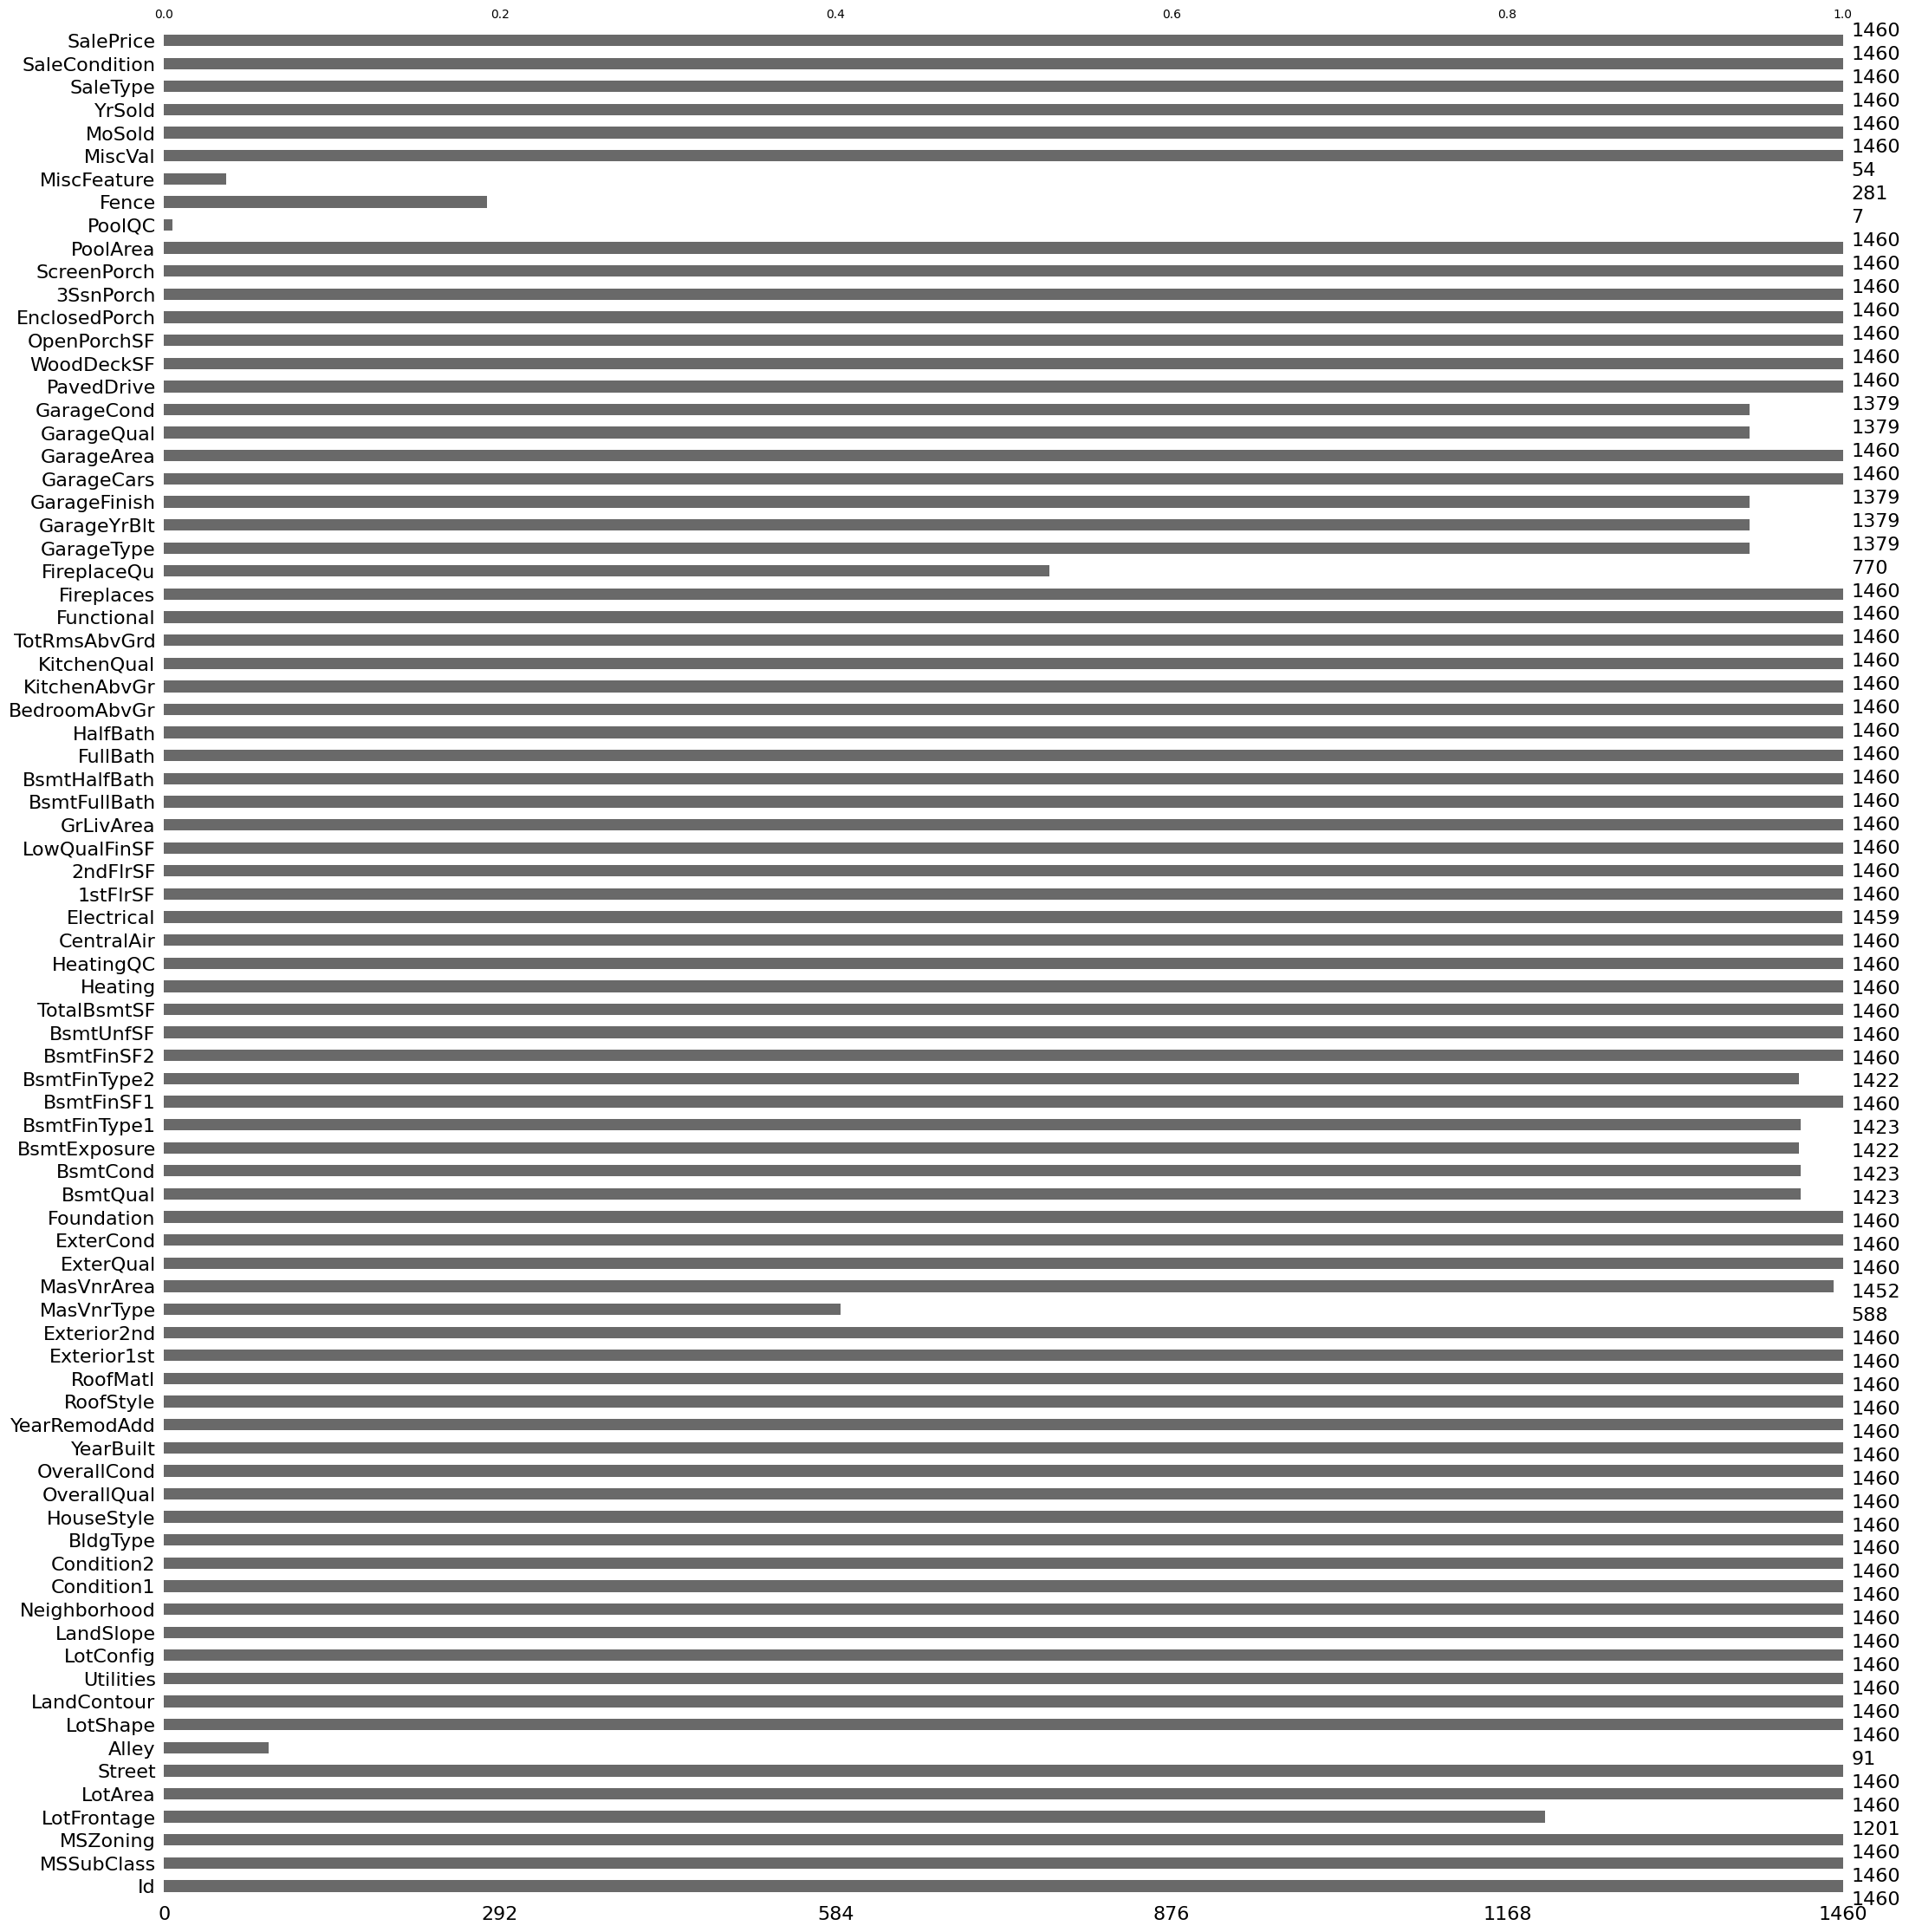

In [8]:
# 1. Check whether each feature has missing values by using the missingno library.
# Import library
import missingno as msno
import matplotlib.pyplot as plt
# Visualize missing values as a bar chart
msno.bar(train_df)

<Axes: >

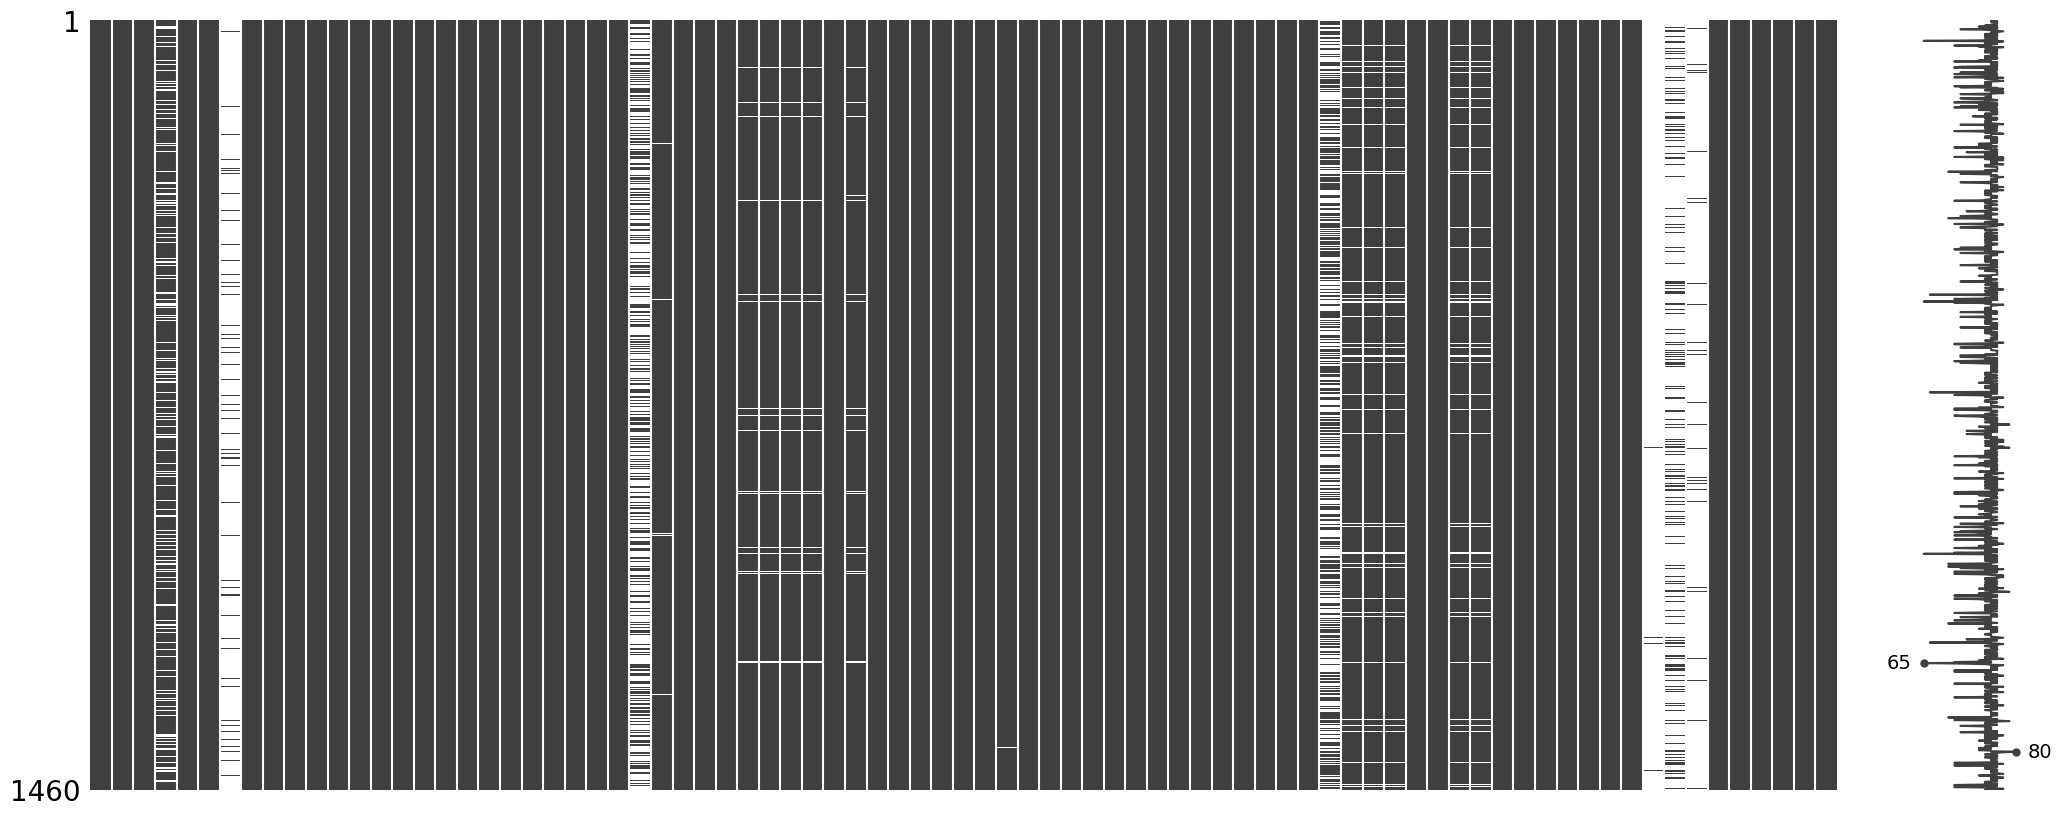

In [9]:
# Visualize missing values as matrix view
msno.matrix(train_df)

In [10]:
# 2.
# shows count of missing values in each feature
missing_values = train_df.isnull().sum()
missing_values
# filters to show only features with missing values
missing_values = missing_values[missing_values>0].sort_values(ascending=False) 
missing_values

PoolQC          1453
MiscFeature     1406
Alley           1369
Fence           1179
MasVnrType       872
FireplaceQu      690
LotFrontage      259
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
GarageCond        81
BsmtFinType2      38
BsmtExposure      38
BsmtFinType1      37
BsmtCond          37
BsmtQual          37
MasVnrArea         8
Electrical         1
dtype: int64

In [11]:
# 2. Check what percentage of data is missing.
missing_percent = (missing_values / len(train_df))
missing_percent
missing_summary = pd.DataFrame({
    'Total': missing_values,
    'missing_ratio': missing_percent.round(6)
})
missing_summary

,Total,missing_ratio
PoolQC,1453,0.995205
MiscFeature,1406,0.963014
Alley,1369,0.937671
Fence,1179,0.807534
MasVnrType,872,0.597260
FireplaceQu,690,0.472603
LotFrontage,259,0.177397
GarageType,81,0.055479
GarageYrBlt,81,0.055479
GarageFinish,81,0.055479


In [12]:
# 3. Features (columns) with five or more missing values are deleted.
# Finding the columns with more than 4 missing values
drop_columns = missing_summary[missing_summary['Total']>=5].index
# Dropping the columns from the DataFrame
train_df_clean = train_df.drop(columns=drop_columns)
# Show number of column dropped
print(f'Deleted {len(drop_columns)} columns with five or more missing values')

Deleted 18 columns with five or more missing values


In [13]:
# 4. From the data after removing features with five or more missing values, samples (rows) with missing values are deleted.
# Drop rows with missing values
train_df_clean = train_df_clean.dropna()
# Show number of remaining columns after removing rows with missing values
print(f'Remaining rows after deleting: {train_df_clean.shape[0]}')

Remaining rows after deleting: 1459


# **Objective variable**
Next, we check the distribution of the objective variable.
# 5. Terminology Research
*Kurtosis* 

It measures the tailedness of a data distribution which tells how much of the data is in the tails (extreme values) compared to a normal distribution.

*Types of kurtosis*
- Mesokurtic: A normal distribution with a kurtosis of 3 (no heavy tails/extrem values).
- Leptokurtic: A distribution with kurtosis greater than 3 indicating heavy tails and more extreme values than a normal distribution.
- Platykurtic: A distribution with kurtosis less than 3, indicating lighter tails and fewer extreme values than a normal distribution.


*Skewness*
Measures the asymmetry of a data distribution. It informs whether the data is skewed to the right or left compared to a normal distribution.
- Positive (Right) Skewness: The tail on the right side (larger values) is longer or fatter than the left side. The mean is greater than the median. More data points are concentrated on the left, but there are a few extreme values pulling the distribution to the right.
- Negative (Left) Skewness: The tail on the left side (smaller values) is longer or fatter than the right side. The mean is less than the median. More data points are concentrated on the right, but there are a few extreme values pulling the distribution to the left.
- Zero Skewness: The data is perfectly symmetrical (like a normal distribution).

These two measures are important for understanding the shape of the distribution, which can impact various statistical analyses and model assumptions. 

# 6. Checking the distribution
- We use seaborn sns.displot() and sns.histplot()to display the distribution of the dependent variable, and also calculate "kurtosis" and "skewness".
- A logarithmic transformation is performed on the response variable.
- The distribution is displayed for the logarithmic transformed data, and "kurtosis" and "skewness" are also calculated.

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


Skewness (original): 1.8819429948035529
Kurtosis (original): 6.529263049673958


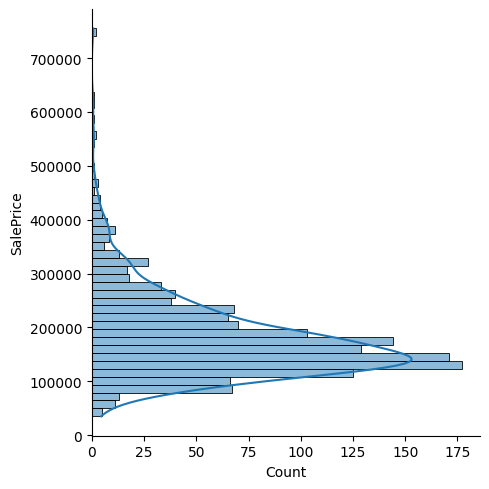

In [14]:
# 1. Display the distribution of the dependent variable and calculate 'Kurtosis' and 'Skewness'
import seaborn as sns
import scipy.stats as stats


sns.displot(data=train_df_clean, y='SalePrice',kde=True)
print("Skewness (original):", train_df_clean['SalePrice'].skew())
print("Kurtosis (original):", train_df_clean['SalePrice'].kurt())

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


Skewness (original): 1.8819429948035529
Kurtosis (original): 6.529263049673958


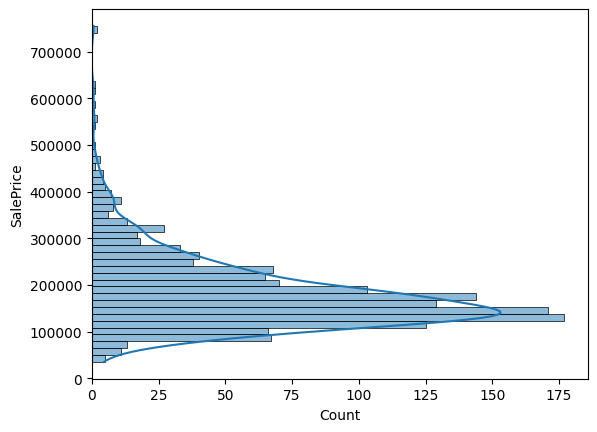

In [15]:
#
sns.histplot(data=train_df_clean, y='SalePrice',kde=True)
print("Skewness (original):", train_df_clean['SalePrice'].skew())
print("Kurtosis (original):", train_df_clean['SalePrice'].kurt())

In [16]:
# 2. A logarithmic transformation is performed on the response variable.
train_df_clean['SalePrice_log'] = np.log(train_df_clean['SalePrice'])

# Check the first few rows after transformation
train_df_clean[['SalePrice', 'SalePrice_log']].head()

,SalePrice,SalePrice_log
0,208500,12.247694
1,181500,12.109011
2,223500,12.317167
3,140000,11.849398
4,250000,12.429216


/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


Skewness (log-transformed): 0.12131775882415026
Kurtosis (log-transformed): 0.806927847502148


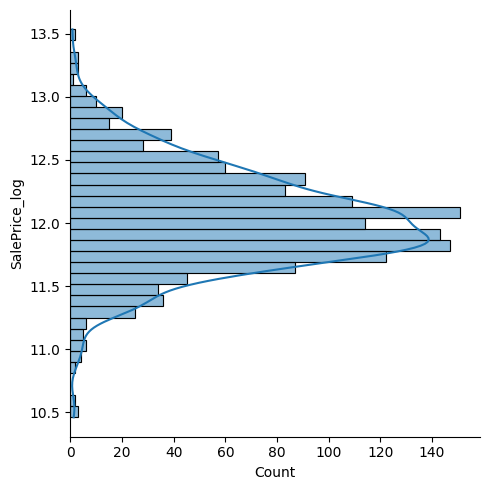

In [17]:
# 3. The distribution is displayed for the logarithmic transformed data, and "kurtosis" and "skewness" are also calculated.
sns.displot(data=train_df_clean, y='SalePrice_log', kde=True)
print("Skewness (log-transformed):", train_df_clean['SalePrice_log'].skew())
print("Kurtosis (log-transformed):", train_df_clean['SalePrice_log'].kurt())

The original dataset before transformation has a skewness of 1.88 which is greater that 0 showing that it is right-skewed. The Kurtosis value is 6.52 (Leptokurtic) which is greater than 3 indicating heavy tails and more extreme values than a normal distribution. After logarithmic transformation, the distribution becomes more normal (bell-shaped).Skewness and Kurtosis decrease approaching 0 for skewness and 0.80 for Kurtosis meaning the data is close to normal. Processing in this way can improve the accuracy of forecasts.

# **Features**
# Checking correlation coefficients
We will check the features by doing the following steps:

- Create a heatmap of the correlation coefficient matrix to find relationships with high correlation coefficients.
- Select 10 features that are highly correlated with the objective variable and create a correlation coefficient matrix heat map using only these features.
- Summarize in Japanese what the 10 selected features represent, referring to the DataDescription on Kaggle.
- Among the 10 selected features, find three combinations that have high correlation coefficients with each other.

When making predictions using multiple regression analysis, etc., a combination of features that are too highly correlated can have a negative impact on the prediction. A simple way to deal with this situation is to find such combinations of features and narrow them down to one.

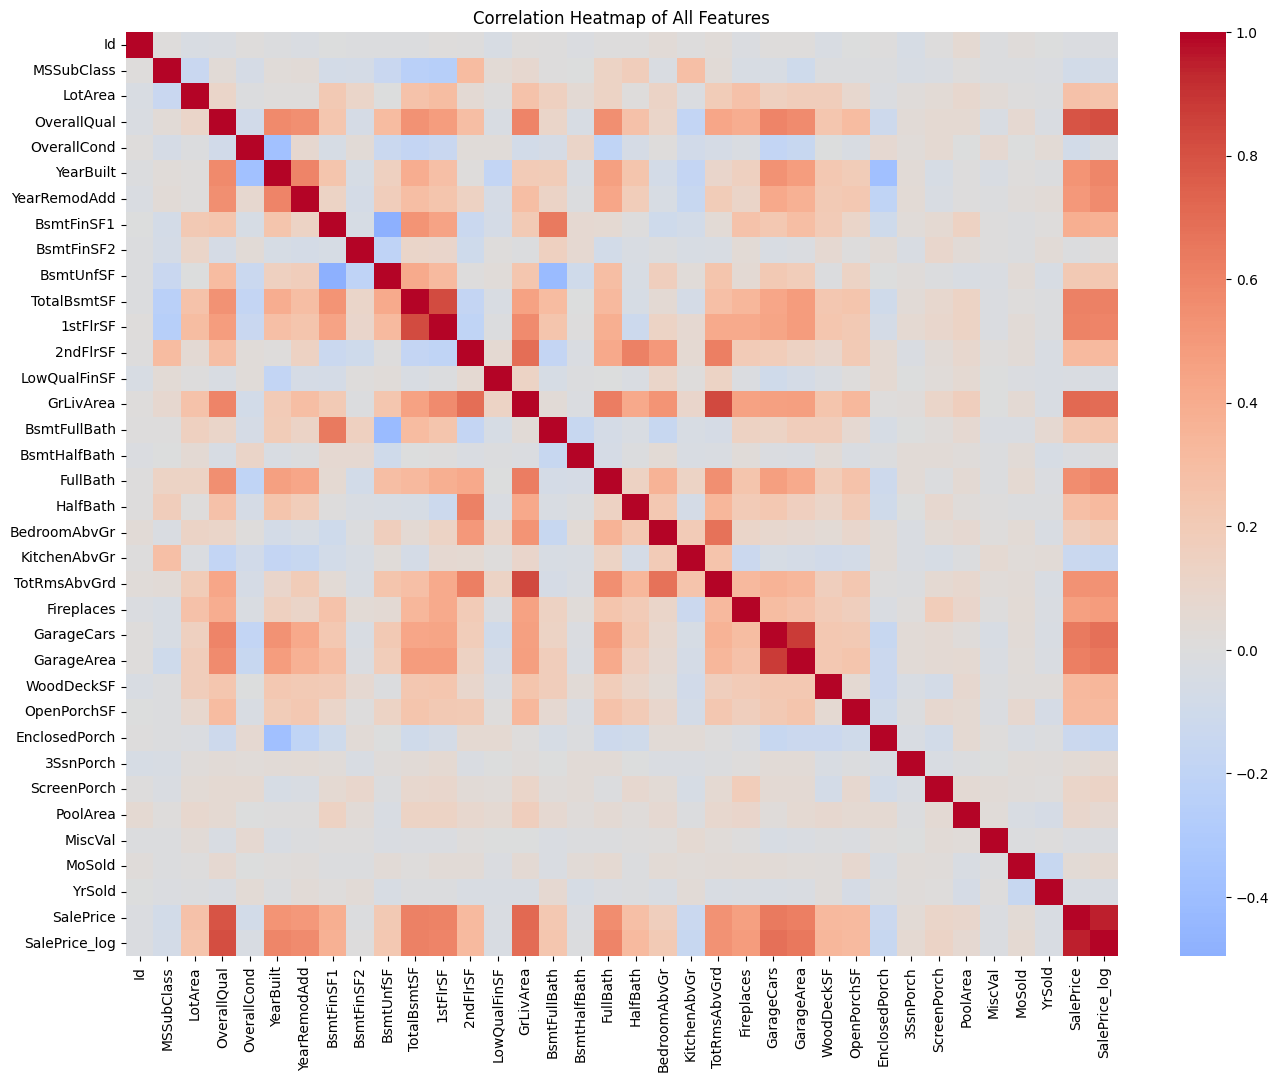

In [18]:
# 1. Create a heatmap of the correlation coefficient matrix to find relationships with high correlation coefficients.
# Calculate correlation matrix
corr_matrix = train_df_clean.corr(numeric_only=True)

# Create a heatmap to find relationships with high correlation coefficient
plt.figure(figsize=(16,12))
sns.heatmap(corr_matrix, annot=False, cmap='coolwarm', center=0)
plt.title('Correlation Heatmap of All Features')
plt.show()

The legend on the side simplifies the visualization by showing red undertones to reflect positive correlation while blue undertones show zero to negative correlation of features.

In [19]:
# 2. Select 10 features that are highly correlated with the objective variable.
# Correlation with SalePrice
target_corr = corr_matrix['SalePrice'].sort_values(ascending=False) 
# Exclude 'SalePrice_log' itself
exclude_targets = ['SalePrice_log','SalePrice']

top_10_features = target_corr.drop(labels=exclude_targets, errors='ignore').head(10).index.tolist()

print('Top 10 Features:\n', top_10_features)

Top 10 Features:
 ['OverallQual', 'GrLivArea', 'GarageCars', 'GarageArea', 'TotalBsmtSF', '1stFlrSF', 'FullBath', 'TotRmsAbvGrd', 'YearBuilt', 'YearRemodAdd']


The top 10 features highly correlated features include:

OverallQual: Overall material and finish quality (high correlation with SalePrice).

GrLivArea: Above ground living area (size is often correlated with price).

GarageCars: Number of cars that can be parked in the garage (often related to the overall house value).

GarageArea: Size of garage in square feet

TotalBsmtSF: Total square feet of basement area

1stFlrSF: First Floor square feet

FullBath: Full bathrooms above grade

TotRmsAbvGrd: otal rooms above grade (does not include bathrooms)

YearBuilt: Original construction date

YearRemodAdd: Remodel date

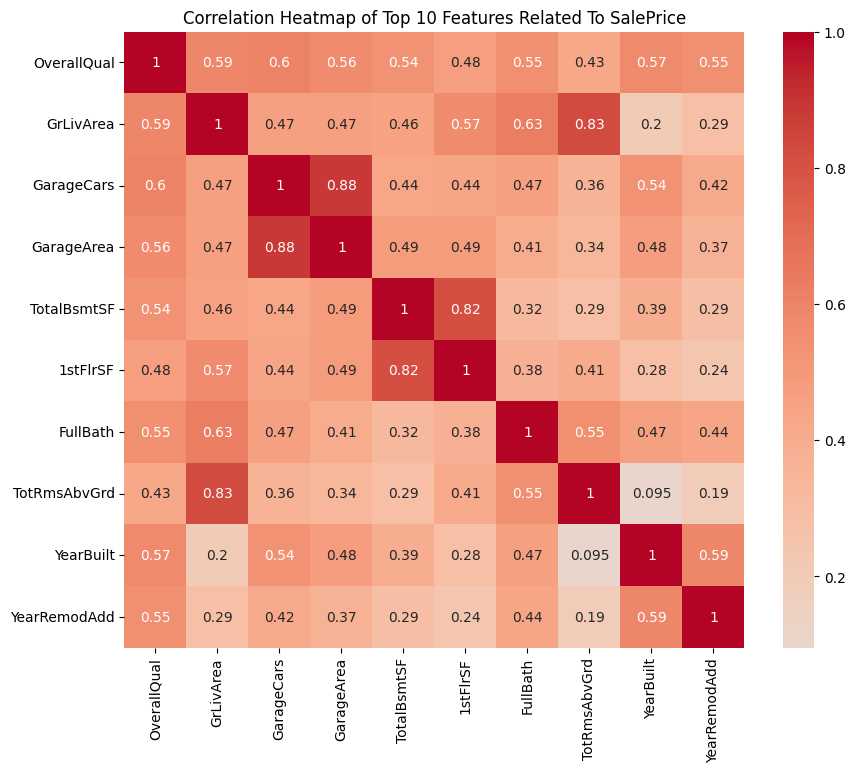

In [20]:
# Create a correlation coefficient matrix heat map using only these features.
top_corr_matrix = train_df_clean[top_10_features].corr()

# Heat map
plt.figure(figsize=(10,8))
sns.heatmap(top_corr_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Heatmap of Top 10 Features Related To SalePrice')
plt.show()

By narrowing down to these 10 features and analyzing their correlation, we've gained valuable insights into which features are highly related to each other. Managing these correlations will help ensure our model performs well and provides accurate predictions.

# 3. Summarize in Japanese what the 10 selected features represent, referring to the DataDescription on Kaggle.
Using Google Translate

Feature: 意味（日本語
1. OverallQual:	全体的な素材と仕上げの品質
2. GrLivArea:	地上居住面積（平方フィート）
3. GarageCars:	車の収容能力に応じたガレージのサイズ
4. GarageArea:	ガレージの面積（平方フィート）
5. TotalBsmtSF:	地下室の総面積（平方フィート）
6. 1stFlrSF:	1階面積
7. FullBath:	地上階にバスルーム完備
8. TotRmsAbvGrd:	地上階の部屋数（バスルームは含みません）
9. YearBuilt:	当初の建設日
10. YearRemodAdd: 改装日

In [21]:
# 4. Among the 10 selected features, find three combinations that have high correlation coefficients with each other.
# Mask the diagonal elements (self-correlations)
np.fill_diagonal(top_corr_matrix.values, 0)

# Find the pairs with high correlation (greater than 0.80)
high_corr = top_corr_matrix.unstack().sort_values(ascending=False)

# Filter out pairs with correlation less than 0.80 and exclude the self-correlation (which is now 0)
high_corr = high_corr[high_corr > 0.80]

# Remove duplicate pairs (e.g., GarageArea vs. GarageCars and vice versa)
high_corr = high_corr[high_corr.index.map(lambda x: x[0] < x[1])]

# Display the first 3 unique pairs with high correlation
print("Top 3 Pairs with High Correlation (> 0.80):")
print(high_corr.head(3))

Top 3 Pairs with High Correlation (> 0.80):
GarageArea  GarageCars      0.882613
GrLivArea   TotRmsAbvGrd    0.825576
1stFlrSF    TotalBsmtSF     0.819393
dtype: float64


The top 3 variables include:

GarageArea and GarageCars have a strong positive correlation of 0.882613 indicating that as the size of the garage increases, the number of cars it can accommodate also tends to increase. 

GrLivArea and TotRmsAbvGrd have a strong positive correlation of 0.825576. A larger living area typically implies more rooms in the house, so it is natural that these two variables are closely related.

1stFlrSF and TotalBsmtSF also have a strong positive correlation of 0.819393. Homes with a larger first floor area tend to also have larger basements.

When making predictions using multiple regression analysis, etc., a combination of features that are too highly correlated can have a negative impact on the prediction. A simple way to deal with this situation is to find such combinations of features and narrow them down to one.
In our case, GarageArea and GarageCars,GrLivArea and TotRmsAbvGrd and,1stFlrSF and TotalBsmtSF pairs have high correlation keeping both variables in each pair in the model could introduce multicollinearity, which would make it difficult to separate their individual effects on the target variable.

To handle this, we can remove one of the highly correlated features (e.g., either GarageArea or GarageCars, GrLivArea or TotRmsAbvGrd) or consider using regularization techniques (e.g., Ridge or Lasso regression) to reduce the impact of correlated features.